In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!gdown --id 1QU_7IUsfpz19rx5Ud3efCE-rFdBgSEND

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QU_7IUsfpz19rx5Ud3efCE-rFdBgSEND
To: /content/sehirler - sehirler_saglikli.csv
100% 3.60k/3.60k [00:00<00:00, 6.07MB/s]


In [3]:
saglikk = pd.read_csv("sehirler - sehirler_saglikli.csv")

In [4]:
saglikk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    51 non-null     object 
 1   Rank                                    51 non-null     int64  
 2   Sunshine hours(City)                    51 non-null     int64  
 3   Cost of a bottle of water(City)         51 non-null     float64
 4   Obesity levels(Country)                 51 non-null     float64
 5   Life expectancy(years) (Country)        51 non-null     float64
 6   Pollution(Index score) (City)           51 non-null     float64
 7   Annual avg. hours worked                51 non-null     int64  
 8   Happiness levels(Country)               51 non-null     float64
 9   Outdoor activities(City)                51 non-null     int64  
 10  Number of take out places(City)         51 non-null     int64  


In [5]:
saglikk.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,1434,7.44,422,1048,34.90
1,Sydney,2,2636,1.48,29.0,82.1,26.86,1712,7.22,406,1103,41.66
2,Vienna,3,1884,1.94,20.1,81.0,17.33,1501,7.29,132,1008,25.74
3,Stockholm,4,1821,1.72,20.6,81.8,19.63,1452,7.35,129,598,37.31
4,Copenhagen,5,1630,2.19,19.7,79.8,21.24,1380,7.64,154,523,32.53


In [6]:
X = saglikk[["Obesity levels(Country)","Pollution(Index score) (City)","Annual avg. hours worked","Happiness levels(Country)","Pollution(Index score) (City)",]]
y = saglikk[["Life expectancy(years) (Country)"]]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 5)
(16, 5)
(35, 1)
(16, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [11]:
model = Sequential()
model.add(Dense(15, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [12]:
opt = Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.979)
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(x_train,y_train,verbose=0, epochs=4000)

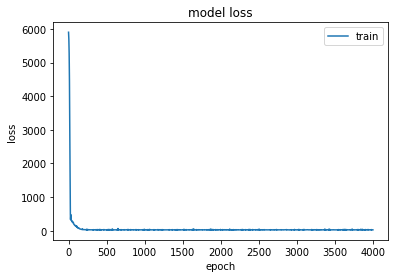

In [13]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [14]:
modelTahmin = model.predict([[20.40,30.93,1434,7.44,30.93]])
print("modelin tahmin:", modelTahmin)

modelin tahmin: [[2937.956]]


In [15]:
tahminler = model.predict(x_test)

In [16]:
tahmin_ve_sonuclar = pd.DataFrame({"Gerçek Değerler" : y_test.values.reshape(-1,), "Tahminler" : tahminler.reshape(-1,)})

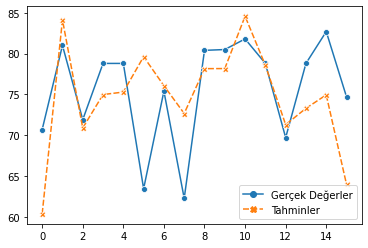

In [17]:
tahmin_ve_sonuclar.head()
sns.lineplot(data=tahmin_ve_sonuclar,markers=True)

In [18]:
from sklearn import metrics
HataDegeri = metrics.mean_squared_error(y_test.values.reshape(-1,), tahminler.reshape(-1,))
print("ortalama kare hatası:", HataDegeri)

ortalama kare hatası: 46.30176936198498
